In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# 2

In [3]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df.sample(10)

,Review,Liked
686,"Prices are very reasonable, flavors are spot o...",1
948,This place is horrible and way overpriced.,0
871,this is the worst sushi i have ever eat beside...,0
936,The sangria was about half of a glass wine ful...,0
648,Great food.,1
166,This place is hands-down one of the best place...,1
707,Would not recommend to others.,0
443,Nothing special.,0
907,The chips and sals a here is amazing!!!!!!!!!!...,1
190,you can watch them preparing the delicious food!),1


# 3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# 4

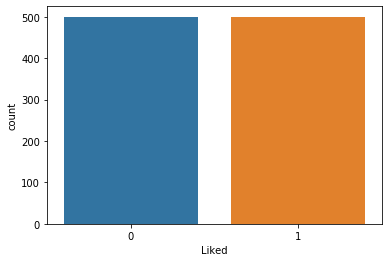

In [8]:
sns.countplot(df['Liked'])

# 5

In [9]:
df['Review'].apply(len)

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [10]:
df['Length'] = df['Review'].apply(len)

In [11]:
df

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


# 6

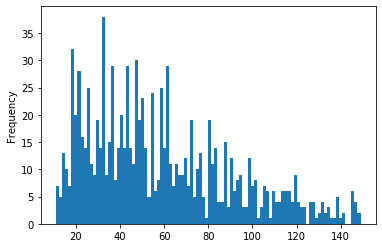

In [12]:
df['Length'].plot(bins=100, kind='hist')

# 7

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92c27141d0>,
      dtype=object)

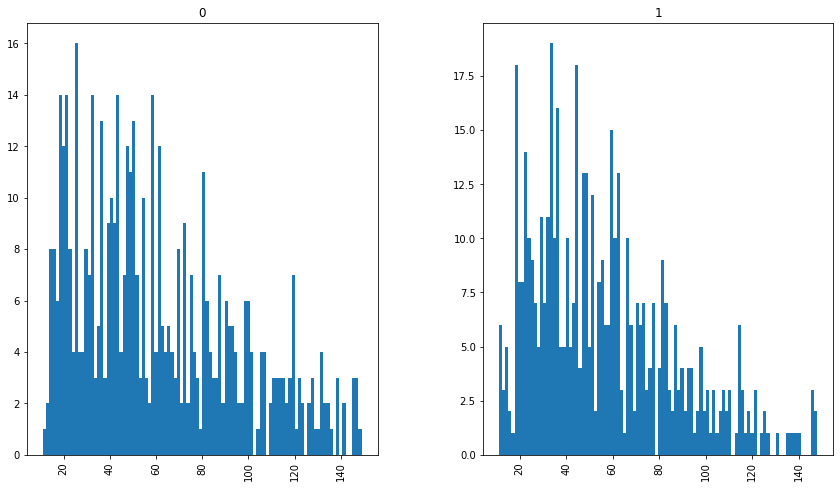

In [13]:
df.hist(column='Length', by='Liked', bins=100, figsize=(14,8))

# 8

In [14]:
df['Length'].max()

149

In [15]:
df[df['Length']==149]

,Review,Liked,Length
985,The problem I have is that they charge $11.99 ...,0,149


In [16]:
df[df['Length']==149]['Review']

985    The problem I have is that they charge $11.99 ...
Name: Review, dtype: object

In [17]:
df[df['Length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

# 9

In [18]:
df.groupby('Liked').mean()

,Length
Liked,
0,60.75
1,55.88


In [19]:
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

# 10

In [20]:
for i in range(10):
    print('\n', df[df['Liked']==0]['Review'].iloc[i])


 Crust is not good.

 Not tasty and the texture was just nasty.

 Now I am getting angry and I want my damn pho.

 Honeslty it didn't taste THAT fresh.)

 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

 Would not go back.

 The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

 I was disgusted because I was pretty sure that was human hair.

 I was shocked because no signs indicate cash only.

 Waitress was a little slow in service.


In [21]:
for i in range(10):
    print('\n', df[df['Liked']==1]['Review'].iloc[i])


 Wow... Loved this place.

 Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

 The selection on the menu was great and so were the prices.

 The fries were great too.

 A great touch.

 Service was very prompt.

 I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!

 Highly recommended.

 The food, amazing.

 Service is also cute.


# 11

In [27]:
import string
from nltk.corpus import stopwords

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/theurk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
def text_filtering(review_text):
    #ลบ punctuation
    no_punc = [x for x in review_text if x not in string.punctuation]
    
    #นำมารวมกันใหม่ ใช้ join
    no_punc = ''.join(no_punc)
    
    #ลบ stopwords
    text = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    
    return text

In [30]:
df['Review'].head(10)

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: Review, dtype: object

In [31]:
df['Review'].head(10).apply(text_filtering)

0                                  [Wow, Loved, place]
1                                        [Crust, good]
2                              [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Stev...
4                     [selection, menu, great, prices]
5                    [getting, angry, want, damn, pho]
6                      [Honeslty, didnt, taste, fresh]
7    [potatoes, like, rubber, could, tell, made, ah...
8                                       [fries, great]
9                                       [great, touch]
Name: Review, dtype: object

# 12

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer = CountVectorizer(analyzer=text_filtering).fit(df['Review'])

In [34]:
bow_transformer

CountVectorizer(analyzer=<function text_filtering at 0x7f92c44df0e0>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

# 13

In [35]:
len(bow_transformer.vocabulary_)

2159

# 14

In [36]:
bow_review = bow_transformer.transform(df['Review'])

In [37]:
bow_review

<1000x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 5606 stored elements in Compressed Sparse Row format>

# 15

In [38]:
bow_review.nnz

5606

In [42]:
bow_review.shape

(1000, 2159)

In [43]:
bow_review.shape[0]

1000

In [44]:
bow_review.shape[1]

2159

In [47]:
#อันนี้คือวิธีที่ถูกต้อง

(bow_review.nnz*100)/(bow_review.shape[0]*bow_review.shape[1])

0.25965724872626217

In [48]:
#การเขียนโปรแกรม ไม่ควรใช้ค่าคงตัว

(bow_review.nnz*100)/(1000*2159)

0.25965724872626217

In [50]:
print('% of sparsity: ', (bow_review.nnz*100)/(bow_review.shape[0]*bow_review.shape[1]))
print('None Zero Numbers: ', bow_review.nnz)
print('Shape of Sparse Matrix: ', bow_review.shape)

% of sparsity:  0.25965724872626217
None Zero Numbers:  5606
Shape of Sparse Matrix:  (1000, 2159)


# 16

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transform = TfidfTransformer().fit(bow_review)

In [53]:
tfidf_review = tfidf_transform.transform(bow_review)
tfidf_review

<1000x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [55]:
#ทดสอบลองดูเฉยๆ เพื่อให้เข้าใจมากขึ้น จริงๆเสร็จตั้งแต่ 3 บรรทัดแรกแล้ว

In [56]:
df['Review'][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [58]:
test_text = text_filtering(df['Review'][3])
test_text

['Stopped',
 'late',
 'May',
 'bank',
 'holiday',
 'Rick',
 'Steve',
 'recommendation',
 'loved']

In [61]:
bow_test = bow_transformer.transform([df['Review'][3]])
bow_test

<1x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [62]:
print(bow_test)

  (0, 265)	1
  (0, 342)	1
  (0, 380)	1
  (0, 381)	1
  (0, 541)	1
  (0, 1162)	1
  (0, 1255)	1
  (0, 1305)	1
  (0, 1651)	1


In [63]:
tfidf_test = tfidf_transform.transform(bow_test)

In [64]:
print(tfidf_test)

  (0, 1651)	0.3141106238036609
  (0, 1305)	0.287160477238048
  (0, 1255)	0.32796490415818413
  (0, 1162)	0.34749141560824715
  (0, 541)	0.34749141560824715
  (0, 381)	0.32796490415818413
  (0, 380)	0.34749141560824715
  (0, 342)	0.34749141560824715
  (0, 265)	0.34749141560824715


# 17

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
nb = MultinomialNB()

In [67]:
X = tfidf_review 
y = df['Liked']

In [68]:
review_rating_model = nb.fit(X,y)

In [69]:
predicted = review_rating_model.predict(X)

# 18

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [74]:
confusion_matrix(y,predicted)

array([[486,  14],
       [ 21, 479]])

# 19

In [75]:
print('Accuracy = ', accuracy_score(y,predicted))
print('F1-score = ', f1_score(y,predicted))
print('Precision = ', precision_score(y,predicted))
print('Recall = ', recall_score(y,predicted))

Accuracy =  0.965
F1-score =  0.9647532729103725
Precision =  0.9716024340770791
Recall =  0.958


# 20  GaussianNB

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
nb = GaussianNB()

In [78]:
review_rating = nb.fit(X.todense(),y)

In [79]:
predicted = review_rating.predict(X.todense())

# 21

In [80]:
confusion_matrix(y,predicted)

array([[456,  44],
       [  0, 500]])

# 22

In [81]:
print('Accuracy = ', accuracy_score(y,predicted))
print('F1-score = ', f1_score(y,predicted))
print('Precision = ', precision_score(y,predicted))
print('Recall = ', recall_score(y,predicted))

Accuracy =  0.956
F1-score =  0.9578544061302682
Precision =  0.9191176470588235
Recall =  1.0


# 23

In [82]:
from sklearn.model_selection import train_test_split

review_train, review_test, label_train, label_test = train_test_split(df['Review'], df['Liked'], test_size=0.2, random_state=100)

# 24

In [83]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=text_filtering)),
        ('tfidf', TfidfTransformer()),
        ('classifier',  MultinomialNB())
])

In [86]:
pipeline.fit(review_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_filtering at 0x7f92c44df0e0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [87]:
predicted = pipeline.predict(review_test)

# 25

In [88]:
confusion_matrix(label_test,predicted)

array([[72, 22],
       [23, 83]])

# 26

In [89]:
print('Accuracy = ', accuracy_score(label_test,predicted))
print('F1-score = ', f1_score(label_test,predicted))
print('Precision = ', precision_score(label_test,predicted))
print('Recall = ', recall_score(label_test,predicted))

Accuracy =  0.775
F1-score =  0.7867298578199052
Precision =  0.7904761904761904
Recall =  0.7830188679245284
